In [169]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib as mpl

In [170]:
% matplotlib inline

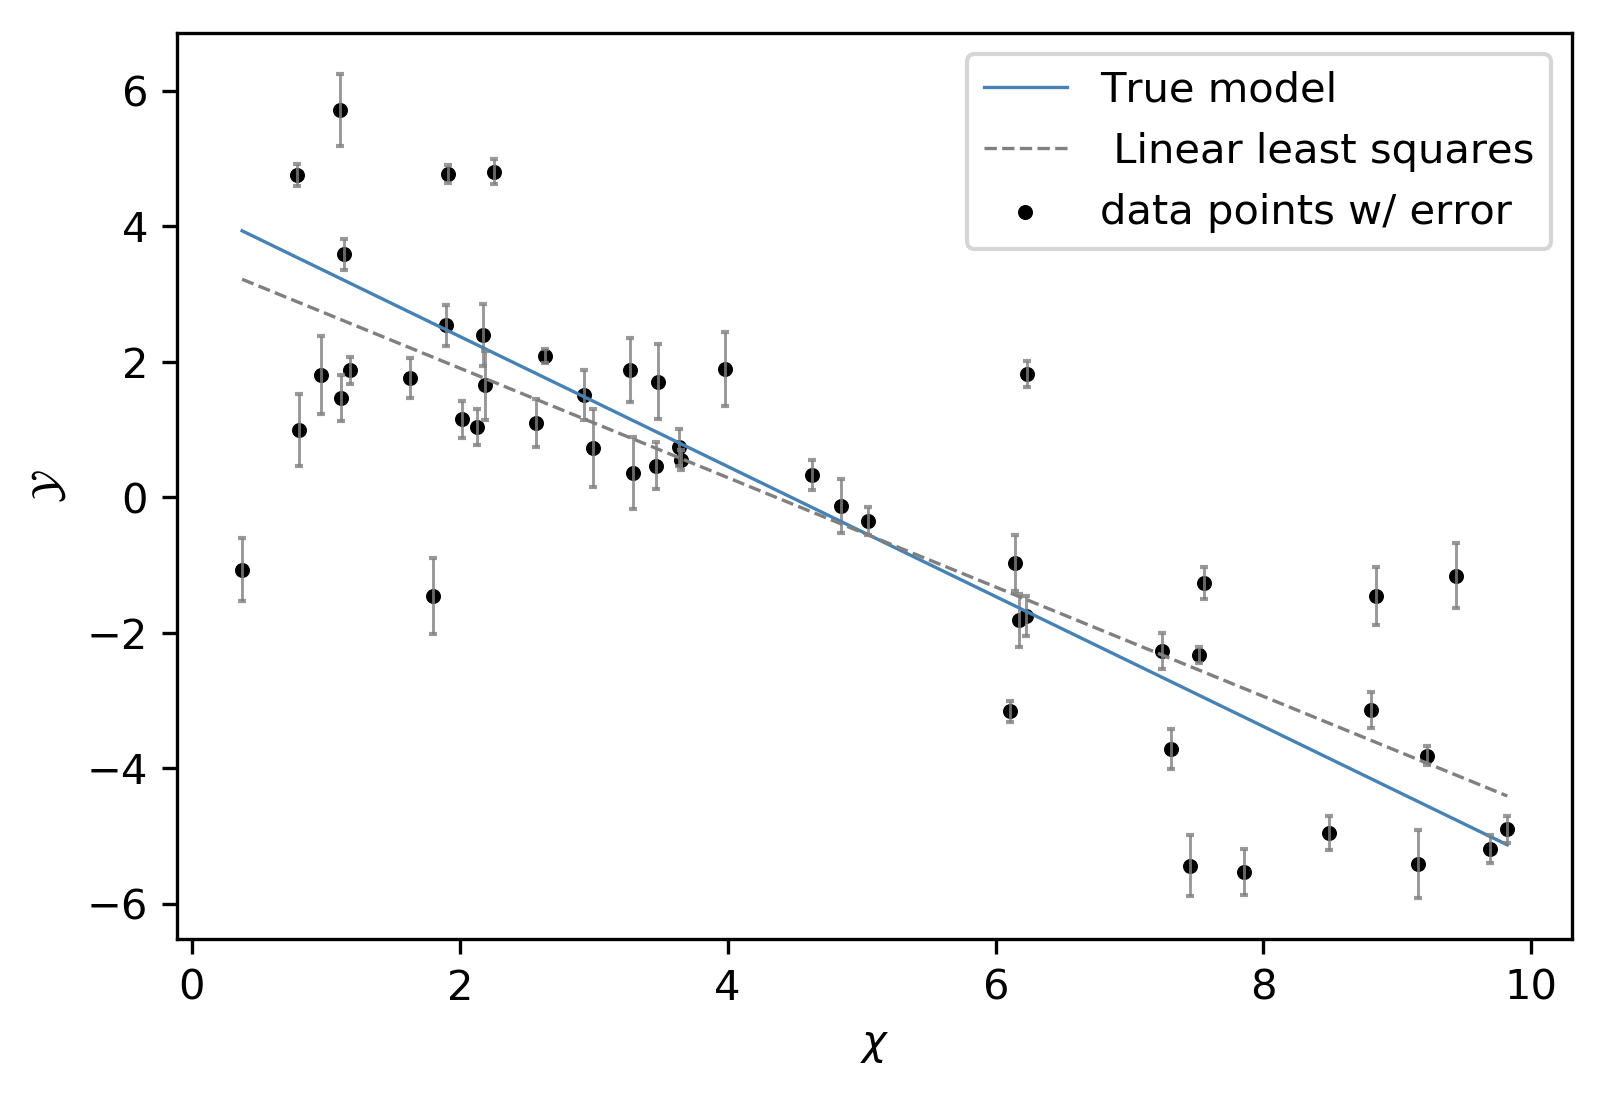

In [181]:
### Define parameters
m_true = -0.9594
b_true = 4.294
f_true = 0.534

### Define x values and the linear equation with above given parameters
N = 50
x = np.sort(10*np.random.rand(N))
y = m_true * x + b_true

### Plot a line with above arguments
plt.plot(x,y, linewidth = .8, color = 'steelblue', label = 'True model')

### Define error and randomly select variation in data points
yerr = 0.1 + 0.5 * np.random.rand(N)
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

### Define parameters and linear function for data by linear least squares argument 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

### Plot data with errorbars, and a line, using linear least squares argument
plt.scatter(x, y, marker = '.', linewidth = .6, color = 'black', label = 'data points w/ error ')
plt.errorbar(x,y, yerr = yerr, fmt = 'none', capsize =1, linewidth = .7, color = 'grey', alpha = .8)
plt.plot(x, line, linewidth = .8, color = 'grey', linestyle = '--', label = ' Linear least squares' )

plt.xlabel(r'$\chi$')
plt.ylabel(r'$\mathcal{Y}$')

plt.legend()

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

In [174]:
import scipy.optimize as op

In [ ]:
nll = lambda x, y, yerr: -lnlike(x, y, yerr)


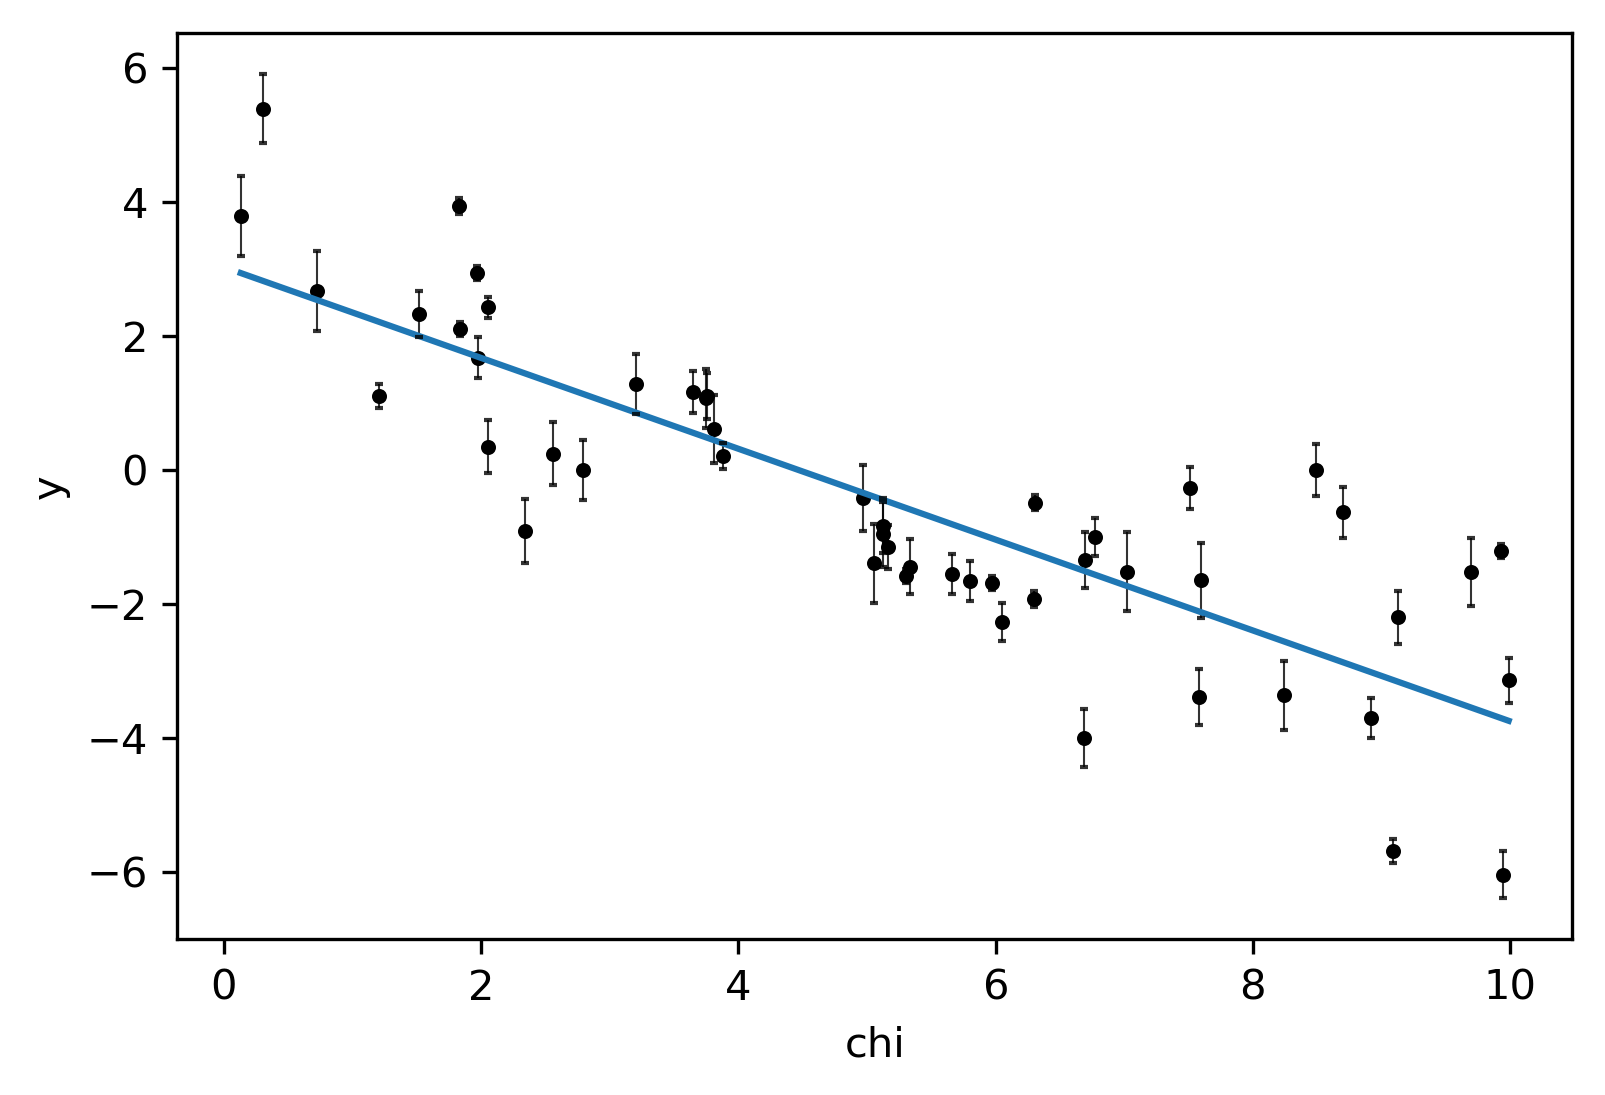

In [151]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept

aa = plt.scatter(x, y, marker = '.', linewidth = .6, color = 'black')
plt.plot(x,line)
plt.errorbar(x,y, yerr = yerr, fmt = 'none', capsize =1, linewidth = .5, color = 'black', alpha = .8)

plt.xlabel('chi')
plt.ylabel('y')

mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300

In [184]:
print (intercept, slope)
print (std_err)
print (r_value, p_value)

3.5219926099673056 -0.8073584577794434
0.08010611512113305
-0.8240740844589549 1.9588931603182299e-13


In [183]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A )))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))


print (b_ls, m_ls)

4.619435192983227 -0.9533155243389717
